<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/age_classes/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 1.x selected.
Mounted at /content/drive
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 16384)
(729,)
--> Reshape data


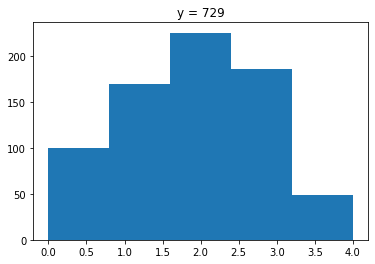

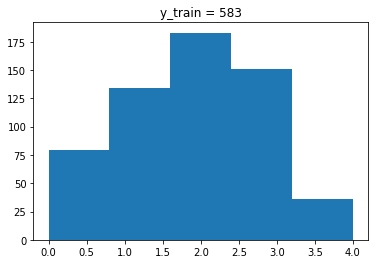

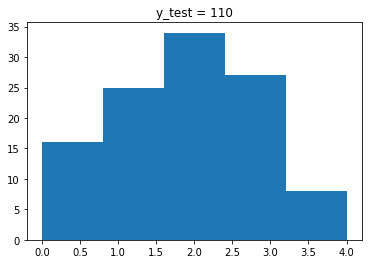

[0 1 2 3 4]
--> Get distance graph
d = |V| = 128, k|V| < |E| = 128444


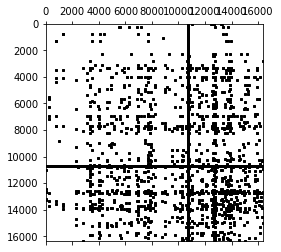

--> Get laplacian matrix


/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])


Layer 0: M_0 = |V| = 125736 nodes (109352 added),|E| = 64222 edges
Layer 1: M_1 = |V| = 62868 nodes (46689 added),|E| = 64188 edges
Layer 2: M_2 = |V| = 31434 nodes (15455 added),|E| = 63564 edges
Layer 3: M_3 = |V| = 15717 nodes (0 added),|E| = 62972 edges
(583, 125736)
(36, 125736)
(110, 125736)
NN architecture
  input: M_0 = 125736
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 125736 * 32 / 4 = 1005888
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 125736 * 32 = 4023552
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 31434 * 32 / 2 = 502944
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 31434 * 32 = 1005888
  layer 3: fc1
    representation: M_3 = 2000
    weights: M_2 * M_3 = 502944 * 2000 = 1005888000
    biases: M_3 = 2000
  layer 4: logits (softmax)
    representation: M_4 = 5
    weights: M_3 * M_4 = 2000 * 5 = 10000
    biases: M_4 = 5







Instructions for updating:
Please use `rate` instead of `keep

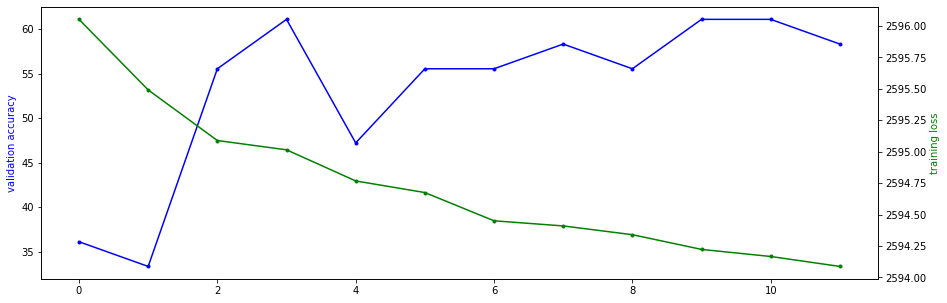

Time per step: 10377.71 ms
(110, 125736) (110,)
############ Class 0
(16, 125736)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 68.75 (11 / 16), f1 (weighted): 81.48, loss: 1.95e+03
time: 16s (wall 10s)
############ Class 1
(25, 125736)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 40.00 (10 / 25), f1 (weighted): 57.14, loss: 2.49e+03
time: 25s (wall 13s)
############ Class 2
(34, 125736)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 52.94 (18 / 34), f1 (weighted): 69.23, loss: 2.75e+03
time: 35s (wall 16s)
############ Class 3
(27, 125736)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 92.59 (25 / 27), f1 (weight

In [1]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train

# classes = { 2, 3, 4, 5, 6, 7, 9 }
%run age_classifier/age_classes_sep \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/converted_data_resize_875_opencv_128.npz' \
  --zip_size=128 \
  --class_count=5 \

%matplotlib inline